In [86]:
import numpy as np
#from sklearn.datasets import fetch_mldata
import torch
from torchvision import datasets,transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [110]:
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])

main_data_set = datasets.MNIST('~/.pytorch/MNIST/',download=True,train=True,transform=transform)

print(type(main_data_set))

train_size = int(0.7 * len(main_data_set))
temp_size = len(main_data_set) - train_size
train_dataset, temp_dataset = torch.utils.data.random_split(main_data_set, [train_size, temp_size])
validation_size = int(0.5 * len(temp_dataset))
test_size = len(temp_dataset) - validation_size
validation_dataset, test_dataset = torch.utils.data.random_split(temp_dataset, [validation_size, test_size])

#print(len(train_dataset))

Img_train_set_array = next(iter(DataLoader(train_dataset, batch_size=len(train_dataset))))[0].numpy()
Label_train_set_array = next(iter(DataLoader(train_dataset, batch_size=len(train_dataset))))[1].numpy()
Img_validation_set_array = next(iter(DataLoader(validation_dataset, batch_size=len(validation_dataset))))[0].numpy()
Label_validation_set_array = next(iter(DataLoader(validation_dataset, batch_size=len(validation_dataset))))[1].numpy()
Img_test_set_array = next(iter(DataLoader(test_dataset, batch_size=len(test_dataset))))[0].numpy()
Label_test_set_array = next(iter(DataLoader(test_dataset, batch_size=len(test_dataset))))[1].numpy()



print(Img_train_set_array.shape)
print(Label_train_set_array.shape)
print(Img_validation_set_array.shape)
print(Label_validation_set_array.shape)
print(Img_test_set_array.shape)
print(Label_test_set_array.shape)

#print(train_set_array)
#print(len(validation_dataset))
#print(len(test_dataset))



<class 'torchvision.datasets.mnist.MNIST'>
(42000, 1, 28, 28)
(42000,)
(9000, 1, 28, 28)
(9000,)
(9000, 1, 28, 28)
(9000,)


In [111]:
def init(x,y):
    layer = np.random.uniform(-1.0,1.0,size=(x,y))/np.sqrt(x*y)
    return layer.astype(np.float32)

np.random.seed(42)
layer_1 = init(28*28,128) # the second layer would consists of 30 neurons.
layer_2 = init(128,10) #the output layer would consists of 10 neurons.


In [112]:
def sigmoid(x):
    return 1/(np.exp(-x) + 1)

def sigmoid_derivative(x):
    return (np.exp(-x))/((np.exp(-x)+1)**2)

In [113]:
#Softmax
def softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)

#derivative of softmax
def d_softmax(x):
    exp_element=np.exp(x-x.max())
    return exp_element/np.sum(exp_element,axis=0)*(1-exp_element/np.sum(exp_element,axis=0))

In [114]:
def forward_backward_pass(x,y):
    targets = np.zeros((len(y),10), np.float32)
    targets[range(targets.shape[0]),y] = 1
 
    
    x_l1=x.dot(layer_1)
    x_sigmoid=sigmoid(x_l1)
    x_l2=x_sigmoid.dot(layer_2)
    out=softmax(x_l2)
   
 
    error=2*(out-targets)/out.shape[0]*d_softmax(x_l2)
    update_l2=x_sigmoid.T@error
    
    
    error=((layer_2).dot(error.T)).T*sigmoid_derivative(x_l1)
    update_l1=x.T@error

    return out,update_l1,update_l2 

In [115]:
epochs = 10000
lr = 0.001
batch=128
losses,accuracies,val_accuracies=[],[],[]


In [116]:
for i in range(epochs):

   

    sample=np.random.randint(0,Img_train_set_array.shape[0],size=(batch))
    x=Img_train_set_array[sample].reshape((-1,28*28))
    y=Label_train_set_array[sample]
 

    out,update_l1,update_l2=forward_backward_pass(x,y)
  
    category=np.argmax(out,axis=1)
    accuracy=(category==y).mean()
    accuracies.append(accuracy)
    
    loss=((category-y)**2).mean()
    losses.append(loss.item())
    
    layer_1=layer_1-lr*update_l1
    layer_2=layer_2-lr*update_l2
    print(i)
    
    Img_validation_set_array=Img_validation_set_array.reshape((-1,28*28))
    val_out=np.argmax(softmax(sigmoid(Img_validation_set_array.dot(layer_1)).dot(layer_2)),axis=1)
    val_acc=(val_out==Label_validation_set_array).mean()
    val_accuracies.append(val_acc.item())
    print(f'For {i}th epoch: train accuracy: {accuracy:.3f} | validation accuracy:{val_acc:.3f}')
else:
    print('done')


0
For 0th epoch: train accuracy: 0.070 | validation accuracy:0.067
1
For 1th epoch: train accuracy: 0.078 | validation accuracy:0.067
2
For 2th epoch: train accuracy: 0.070 | validation accuracy:0.067
3
For 3th epoch: train accuracy: 0.062 | validation accuracy:0.067
4
For 4th epoch: train accuracy: 0.039 | validation accuracy:0.067
5
For 5th epoch: train accuracy: 0.086 | validation accuracy:0.067
6
For 6th epoch: train accuracy: 0.070 | validation accuracy:0.067
7
For 7th epoch: train accuracy: 0.031 | validation accuracy:0.067
8
For 8th epoch: train accuracy: 0.102 | validation accuracy:0.067
9
For 9th epoch: train accuracy: 0.055 | validation accuracy:0.067
10
For 10th epoch: train accuracy: 0.078 | validation accuracy:0.067
11
For 11th epoch: train accuracy: 0.094 | validation accuracy:0.067
12
For 12th epoch: train accuracy: 0.102 | validation accuracy:0.067
13
For 13th epoch: train accuracy: 0.039 | validation accuracy:0.067
14
For 14th epoch: train accuracy: 0.086 | validation 

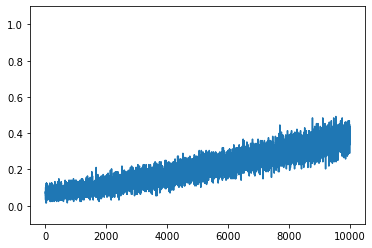

In [117]:
plt.ylim(-0.1, 1.1)
plt.plot(accuracies)

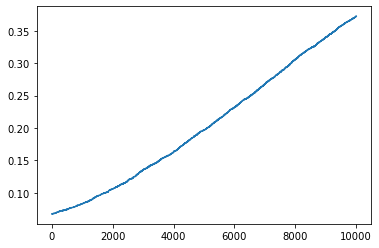

In [118]:
plt.plot(val_accuracies)

In [119]:
test_out=np.argmax(softmax(sigmoid(Img_validation_set_array.dot(layer_1)).dot(layer_2)),axis=1)
test_acc=(test_out==Label_validation_set_array).mean().item()
print(f'Test accuracy = {test_acc*100:.2f}%')

Test accuracy = 37.27%
